## Data read use the data on pdf

In [162]:
t_x=[]
t_y=[]
with open('dt.txt','r') as f:
    line=f.readlines()
    for lines in line:
        tp=lines.split(',')
        t_x.append(float(tp[0]))
        t_y.append(float(tp[1].split('\n')[0]))
#print(t_y)

## Library used

In [159]:
import math
import numpy as np
from numpy.linalg import inv # use after LU to check do right or not 
degree=1
penality_rate=0.3

## LSE method with loss and parameters

In [239]:
class LSE():
    def __init__(self,n_degree=1,lambd=0):
        self.degree=n_degree
        self.lambd=lambd
        self.iden=np.identity(self.degree+1)
    def A_matrix(self,x):
        A=np.array([[x[j]**i for i in range(self.degree,-1,-1)]for j in range(len(x))])
        #print(np.shape(A))
        return A
    def LUdecompostion(self,A):
        rows,columns=np.shape(A)
        L_matrix=np.zeros((rows,columns))
        U_matrix=np.zeros((rows,columns))
        #rows=self.degree
        for i in range(rows):
            for j in range(i-1):
                total=0
                for k in range(j-1):
                    total+=L_matrix[i][k]*U_matrix[k][j] #矩陣乘法
                L_matrix[i][j]=(A[i][j]-total)/U_matrix[j][j]
            L_matrix[i][i]=1
            for j in range(i-1,rows):
                total_1=0
                for k in range(i-1):
                    total_1+=L_matrix[i][k]*U_matrix[k][j]
                U_matrix[i][j]=(A[i][j]-total_1)
        return self.inverse_lowwer_matrix(L_matrix),self.inverse_upper_matrix(U_matrix)
    def inverse_lowwer_matrix(self,A):
        n,m=np.shape(A)
        if n!=m:
            print("行列數目不相同要使用pseudo inverse")
            return
        B=A
        I_A=np.identity(n)
        for i in range(n):
            Divisor=B[i][i]
            for j in range(i+1):
                B[i][j]=B[i][j]/Divisor
                I_A[i][j]=I_A[i][j]/Divisor
                #print(A)
        for i in range(n):
            for j in range(i+1,n):
                Multi=B[j][i]
                for k in range(m):
                    B[j][k]=B[j][k]-Multi*B[i][k]
                    I_A[j][k]=I_A[j][k]-Multi*I_A[i][k]
        return I_A
    def inverse_upper_matrix(self,A):
        n,m=np.shape(A)
        B=A
        if n!=m:
            print("行列數目不相同要使用pseudo inverse")
            return
        I_A=np.identity(n)
        for i in range(n):
            Divisor=B[i][i]
            for j in range(i,m):
                B[i][j]=B[i][j]/Divisor
                I_A[i][j]=I_A[i][j]/Divisor
                #print(A)
        for i in range(n-1,-1,-1):
            for j in range(i-1,-1,-1):
                Multi=B[j][i]
                for k in range(m):
                    B[j][k]=B[j][k]-Multi*B[i][k]
                    I_A[j][k]=I_A[j][k]-Multi*I_A[i][k]
        return I_A
    def forward(self,x,b):
        A=self.A_matrix(x)
        L,U=self.LUdecompostion(np.dot(A.T,A)+self.lambd*self.iden)
        #print(L,U)
        para=np.dot(np.dot(np.dot(U,L),A.T),(b))
        #para=np.dot(np.dot(A.T,inv(np.dot(A,A.T)+self.lambd*self.iden)),(b))
        return para 
    def calculus_error(self,paras,x,y):
        A=self.A_matrix(x)
        err=np.sum(np.square(np.dot(A,paras)-y))
        #error=0
        #for i in range(len(x)):
        #    error+=(y[i]-np.dot(A[i],paras))**2
        return err
LSE1=LSE(n_degree=degree,lambd=penality_rate)
para_rlse=LSE1.forward(t_x,t_y)
errs_rlse=LSE1.calculus_error(para_rlse,t_x,t_y)
for i in range(len(para_rlse)):
    print(para_rlse[i])
print(errs_rlse)

3.0819181673210925
3.9622839277168707
-0.04293404701190262
255.40303284585016


## Newton method with loss and parameter

In [240]:
class Newton():
    def __init__(self,n_degree=1):
        self.degree=n_degree
    def A_matrix(self,x):
        A=np.array([[x[j]**i for i in range(self.degree,-1,-1)]for j in range(len(x))])
        #print(np.shape(A))
        return A
    def inverse_lowwer_matrix(self,A):
        n,m=np.shape(A)
        if n!=m:
            print("行列數目不相同要使用pseudo inverse")
            return
        B=A
        I_A=np.identity(n)
        for i in range(n):
            Divisor=B[i][i]
            for j in range(i+1):
                B[i][j]=B[i][j]/Divisor
                I_A[i][j]=I_A[i][j]/Divisor
                #print(A)
        for i in range(n):
            for j in range(i+1,n):
                Multi=B[j][i]
                for k in range(m):
                    B[j][k]=B[j][k]-Multi*B[i][k]
                    I_A[j][k]=I_A[j][k]-Multi*I_A[i][k]
        return I_A
    def inverse_upper_matrix(self,A):
        n,m=np.shape(A)
        B=A
        if n!=m:
            print("行列數目不相同要使用pseudo inverse")
            return
        I_A=np.identity(n)
        for i in range(n):
            Divisor=B[i][i]
            for j in range(i,m):
                B[i][j]=B[i][j]/Divisor
                I_A[i][j]=I_A[i][j]/Divisor
                #print(A)
        for i in range(n-1,-1,-1):
            for j in range(i-1,-1,-1):
                Multi=B[j][i]
                for k in range(m):
                    B[j][k]=B[j][k]-Multi*B[i][k]
                    I_A[j][k]=I_A[j][k]-Multi*I_A[i][k]
        return I_A
    def LUdecompostion(self,A):
        rows,columns=np.shape(A)
        L_matrix=np.zeros((rows,columns))
        U_matrix=np.zeros((rows,columns))
        #print(rows,columns)
        for i in range(rows):
            for j in range(i-1):
                total=0
                for k in range(j-1):
                    total+=L_matrix[i][k]*U_matrix[k][j] #矩陣乘法
                L_matrix[i][j]=(A[i][j]-total)/U_matrix[j][j]
            L_matrix[i][i]=1
            for j in range(i-1,rows):
                total_1=0
                for k in range(i-1):
                    total_1+=L_matrix[i][k]*U_matrix[k][j]
                U_matrix[i][j]=(A[i][j]-total_1)
        return self.inverse_lowwer_matrix(L_matrix),self.inverse_upper_matrix(U_matrix)
    def forward(self,x,b):
        A=self.A_matrix(x)
        x_0=np.random.rand(self.degree+1,1)
        x_1=np.zeros(self.degree+1)
        A_square=np.dot(A.T,A)
        #print(np.shape(A))
        L,U=self.LUdecompostion(A_square*2)
        #hession_inverse=inv(2*A_square)#np.dot(U,L)
        hession_inverse=np.dot(U,L)
        eps=100
        while eps>1e-6:
            gradi=np.dot(2*A_square,x_0)-(np.dot(2*A.T,b)).reshape(-1,1)
            #print(np.shape(np.dot(2*A_square,x_0)))
            #print(np.shape(np.dot(2*A.T,b).reshape(-1,1)))
            #print('---------')
            x_1=x_0-1.5*(np.dot(hession_inverse,gradi))
            eps=abs(np.sum(np.square(x_1-x_0))/(self.degree+1))
            x_0=x_1
            #print(x_0)
        return x_0
    def calculus_error(self,parasm,x,y):
        A=self.A_matrix(x)
        err=np.sum(np.square(np.dot(A,parasm)-y))
        return err
Newton1=Newton(n_degree=degree)
para_newton=Newton1.forward(t_x,t_y)
errs_newton=Newton1.calculus_error(para_newton,t_x,t_y)

print(para_newton)
print(errs_newton)

[[ 3.02400064]
 [ 4.90567088]
 [-0.23105921]]
953910.5869749377


## Plot both and save as hw_1.jpg

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python3/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    supe

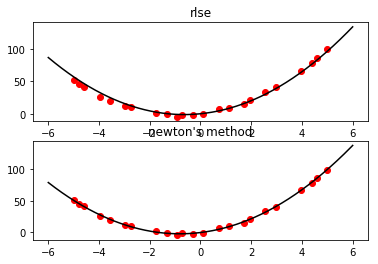

In [241]:
matplotlib.use('Agg')
import matplotlib
#degree=
from matplotlib.pyplot import plot,savefig
def plot(x1,b,parameters_rlse,parameters_newton):
    #rlse
    plt.subplot(2,1,1)
    plt.title('rlse')
    plt.plot(x1,b,'ro')
    x1_min=min(x1)
    x1_max=max(x1)
    x=np.linspace(x1_min-1,x1_max+1,500)
    y=np.zeros(x.shape)
    for i in range(len(parameters_rlse)):
        y+=parameters_rlse[degree-i]*np.power(x,i)
    plt.plot(x,y,'-k')
    #newton
    plt.subplot(2,1,2)
    plt.title('newton\'s method')
    plt.plot(x1, b, 'ro')
    y = np.zeros(x.shape)
    for i in range(len(parameters_newton)):
        y += parameters_newton[degree-i] * np.power(x, i)
    plt.plot(x, y, '-k')
    
    plt.show()
    plt.savefig('hw_1.jpg')
plot(t_x,t_y,para_rlse,para_newton)

In [147]:
A=np.array([[3**i for i in range(3,-1,-1)] for j in range(3)])
B=np.array([[3**i for i in range(3,-1,-1)] for j in range(3)])
print(A)

[[27  9  3  1]
 [27  9  3  1]
 [27  9  3  1]]


In [223]:
def A_matrix(x,col):
    A=np.array([[x[j]**i for i in range(3-1,-1,-1)]for j in range(col)])
    #print(np.shape(A))
    return A
def LUdecompostion(A):
    rows,columns=np.shape(A)
    L_matrix=np.zeros((rows,columns))
    U_matrix=np.zeros((rows,columns))
    #rows=self.degree
    for i in range(rows):
        for j in range(i,rows):
            total=0
            for k in range(i):
                total+=L_matrix[i][k]*U_matrix[k][j] #矩陣乘法
            U_matrix[i][j]=(A[i][j]-total)
        #L_matrix[i][i]=1
        for j in range(i,rows) :
            total_1=0
            if (i == j):
                L_matrix[i][i]=1
            else:
                for k in range(i):
                    total_1+=L_matrix[j][k]*U_matrix[k][i]
                L_matrix[j][i]=(A[j][i]-total_1)/U_matrix[i][i]
    return (L_matrix),(U_matrix)
#A=A_matrix(t_x,len(t_x))
#L=np.dot(A,np.transpose(A))
L=[[1,2,3],[2,5,7],[3,5,3]]
L_1,U_1=LUdecompostion(L)
print(L_1,U_1)
#print((L==R).all())

[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [ 3. -1.  1.]] [[ 1.  2.  3.]
 [ 0.  1.  1.]
 [ 0.  0. -5.]]


In [224]:
def inverse_upper_matrix(A):
    n,m=np.shape(A)
    B=A
    if n!=m:
        print("行列數目不相同要使用pseudo inverse")
        return
    I_A=np.identity(n)
    for i in range(n):
        Divisor=B[i][i]
        for j in range(i,m):
            B[i][j]=B[i][j]/Divisor
            I_A[i][j]=I_A[i][j]/Divisor
            #print(A)
    for i in range(n-1,-1,-1):
        for j in range(i-1,-1,-1):
            Multi=B[j][i]
            for k in range(m):
                B[j][k]=B[j][k]-Multi*B[i][k]
                I_A[j][k]=I_A[j][k]-Multi*I_A[i][k]
    return I_A
U_2=U_1
print(U_1)
print(inv(U_2))
I_U=inverse_upper_matrix(U_1)
print(I_U)

[[ 1.  2.  3.]
 [ 0.  1.  1.]
 [ 0.  0. -5.]]
[[ 1.  -2.   0.2]
 [ 0.   1.   0.2]
 [-0.  -0.  -0.2]]
[[ 1.  -2.   0.2]
 [ 0.   1.   0.2]
 [ 0.   0.  -0.2]]


In [225]:
def inverse_lowwer_matrix(A):
    n,m=np.shape(A)
    if n!=m:
        print("行列數目不相同要使用pseudo inverse")
        return
    B=A
    I_A=np.identity(n)
    for i in range(n):
        Divisor=B[i][i]
        for j in range(i+1):
            B[i][j]=B[i][j]/Divisor
            I_A[i][j]=I_A[i][j]/Divisor
            #print(A)
    for i in range(n):
        for j in range(i+1,n):
            Multi=B[j][i]
            for k in range(m):
                B[j][k]=B[j][k]-Multi*B[i][k]
                I_A[j][k]=I_A[j][k]-Multi*I_A[i][k]
    return I_A
L_2=L_1
print(L_1)
print(inv(L_2))
I_L=inverse_lowwer_matrix(L_1)
print(I_L)

[[ 1.  0.  0.]
 [ 2.  1.  0.]
 [ 3. -1.  1.]]
[[ 1.00000000e+00  0.00000000e+00  1.48029737e-17]
 [-2.00000000e+00  1.00000000e+00 -6.66133815e-17]
 [-5.00000000e+00  1.00000000e+00  1.00000000e+00]]
[[ 1.  0.  0.]
 [-2.  1.  0.]
 [-5.  1.  1.]]


In [202]:
L=[[1,2,3],[0,1,1],[0,0,1]]
A=[[1,0,0],[0,1,0],[0,0,-0.2]]
for i in range(3-1,-1,-1):
    for j in range(i-1,-1,-1):
        Multi=L[j][i]/L[i][i]
        L[j][i]=L[j][i]-Multi
        A[i][j]=(-Multi*A[i][i])
print(A)

[[1, 0, 0], [-2.0, 1, 0], [0.6000000000000001, 0.2, -0.2]]


In [ ]:

def LU_inverse(B):
        #I_U=np.zeros((self.degree,self.degree))
        #I_L=E1
        #for i in range(self.degree):# U的inverse
        #    I_U[i][i]=1/U_matrix[i][i]
        #    for j in range(i-1)
        n,m=np.shape(B)
        for k in range(n):
            Divisor = B[k][k]
            for i in range(k, m):
                B[k][i] = B[k][i]/Divisor
            for i in range(k+1, n):
                Multi = B[i][k]
                for j in range(m):
                    B[i][j] = B[i][j] - B[k][j] * Multi